Netflix Data Analysis With Python

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px

In [41]:
data = pd.read_csv(r"C:\Users\raj45\OneDrive\Documents\pandas\netflix_titles.csv")
data.shape

(8807, 12)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [43]:
pd.DataFrame(data)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [44]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

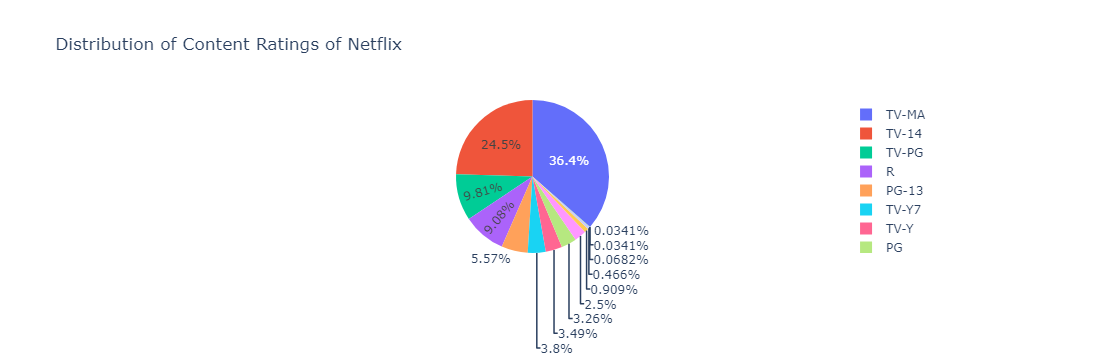

In [45]:
z = data.groupby(['rating']).size().reset_index(name='count')
piechart = px.pie(z, values='count', names='rating',
                  title='Distribution of Content Ratings of Netflix')
piechart.show() 

The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

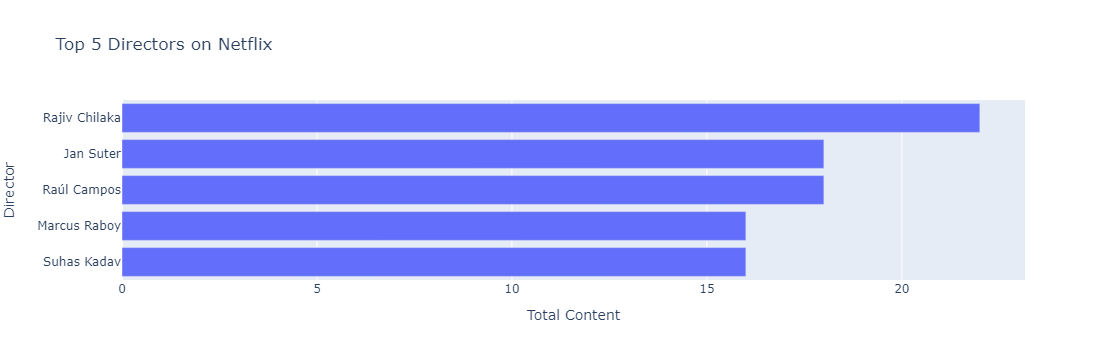

In [46]:
data['director']=data['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=data['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors.sort_values(by=['Total Content'],ascending=False)
directors=directors.drop(directors[directors['Director'] =='No Director Specified'].index)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

From the above graph it is derived that the top 5 directors on this platform 

In [47]:
data['cast'].isnull().sum()

825

In [48]:
data['cast']=data['cast'].fillna('no cast specified')

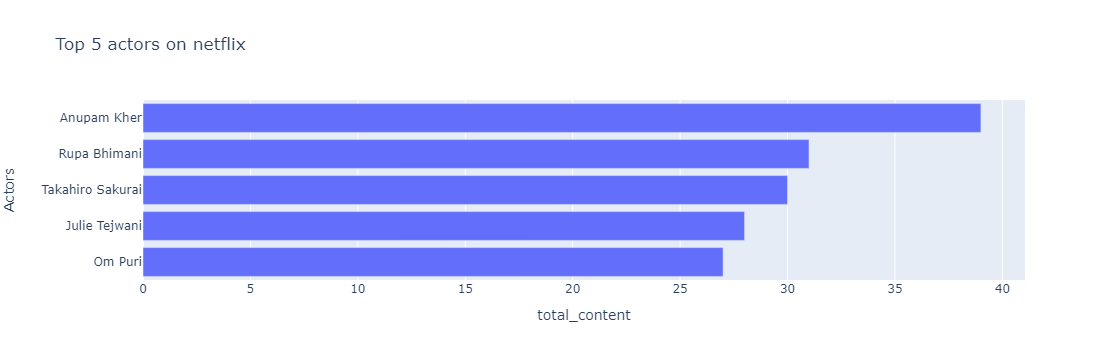

In [49]:
filtered_cast = pd.DataFrame
filtered_cast = data['cast'].str.split(',', expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actors']
actors = filtered_cast.groupby(['Actors']).size().reset_index(name='total_content')
actors = actors.sort_values(by=['total_content'], ascending=False)
actors = actors.drop(actors[actors['Actors'] == 'no cast specified'].index)
actorsTop5 = actors.head()
actorsTop5=actorsTop5.sort_values(by=['total_content'])
fig2=px.bar(actorsTop5,x='total_content',y='Actors',title='Top 5 actors on netflix')
fig2.show()

From the above plot, it is derived that the top 5 actors on Netflix are

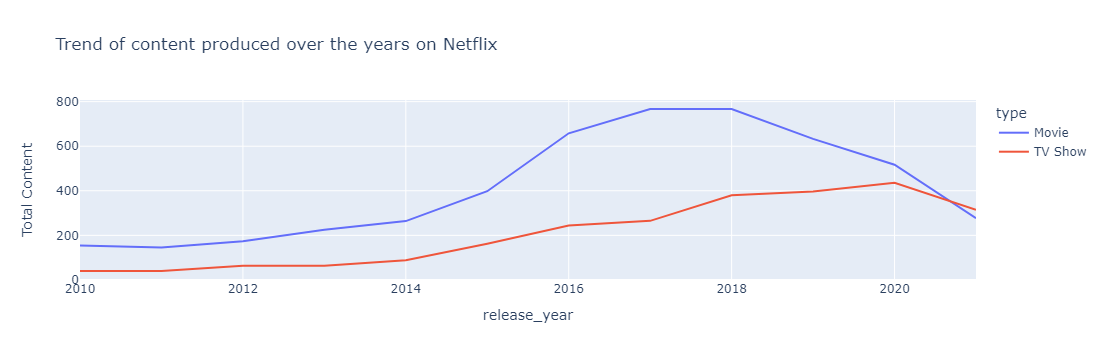

In [50]:
data1=data[['release_year','type']]
data1=data1.groupby(['release_year','type']).size().reset_index(name='Total Content')
data1=data1[data1['release_year']>=2010]
fig3=px.line(data1,x='release_year',y='Total Content',color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

The above line graph shows that there has been a decline in the production of the content for both movies and other shows since 2020.